 # # Data Visualisation

# Vorbereitungen

Zu Beginn werden die relevanten Packages geladen.

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Hier wird der aufbereitete Dataframe geladen. 
Desweiteren schauen wir ihn uns einmal an.

In [9]:
df=pd.read_csv('MdB_Indexed.csv')

df.head(5)

,WP-JAHRE,NUMIND,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,AUSLAND,MANDATSART,WP1,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
0,1949-1953;01,0,1949,73,1,Union,Bundeskanzler a. D.,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1949-1953;01,1,1949,45,1,Andere,"Bergmann, Gewerkschaftsfunktionär",0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,1949-1953;01,2,1949,70,1,Andere,Kapitän a. D.,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1949-1953;01,3,1949,59,1,Union,Geschäftsführer,0,1.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1949-1953;01,4,1949,48,0,SPD,Buchhalterin,0,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.tail(5)

,WP-JAHRE,NUMIND,ANFANG,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,AUSLAND,MANDATSART,WP1,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
11595,2017-;19,11595,2017,54,1,AfD,Rechtsanwalt,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
11596,2017-;19,11596,2017,58,1,AfD,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
11597,2017-;19,11597,2017,32,1,Union,Angestellter / Student,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
11598,2017-;19,11598,2017,28,0,FDP,Politikwissenschaftlerin,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
11599,2017-;19,11599,2017,33,0,SPD,Studienrätin,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In der Analyse werden die Jahre 1949 (1. Bundestag), 1983 und 2017 (aktueller Bundestag) gesondert betrachtet. Um diese Jahre einzeln betrachten zu können, erstellen wir neue DataFrames, indem wir den AusgangsFrame slicen.  

In [11]:
df_1949=df[df.ANFANG==1949]
df_1983=df[df.ANFANG==1983]
df_2017=df[df.ANFANG==2017]

In [12]:
df_SPD= df[df.PARTEI_KURZ == "SPD"]
df_CDU= df[df.PARTEI_KURZ == "Union"]
df_GRUENE= df[df.PARTEI_KURZ == "Bündnis 90/Die Grünen"]
df_FDP= df[df.PARTEI_KURZ == "FDP"]
df_LINKE= df[df.PARTEI_KURZ == "Die Linke"]

# Altersstruktur

Bei der Betrachtung der Alterstruktur ist zu beachten, dass das Alter des MdB zu Beginn der jeweiligen Wahlperiode berechnet wird. 
Zu Beginn schauen wir uns das Durchschnittsalter der MdB im zeitlichen Verlauf an.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Durschnittsalter der MdB im zeitlichen Verlauf')

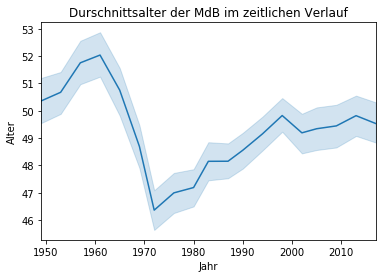

In [23]:
sns.lineplot(x="ANFANG", y="ALTER", data=df)
plt.xlabel('Jahr')
plt.xlim(1949, 2017)
plt.ylabel('Alter')
plt.title('Durschnittsalter der MdB im zeitlichen Verlauf')

Als nächstes schauen wir uns die Altersverteilung im Bundestag an. Die Alterstruktur wird mithilfe eines Histogramms geplotted. Die Zahl der Bins wurde so gewählt, das ein bin 5 Jahre abdeckt.

Text(0,0.5,'Anzahl MdB')

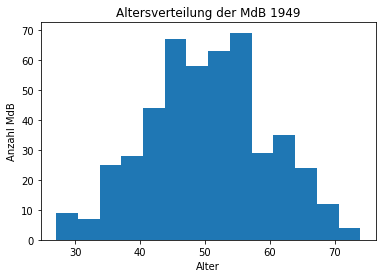

In [14]:
df_1949.ALTER.plot(kind="hist", title="Altersverteilung der MdB 1949", bins=14)
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")

Text(0,0.5,'Anzahl MdB')

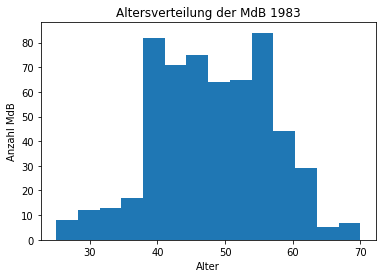

In [15]:
df_1983.ALTER.plot(kind="hist", title="Altersverteilung der MdB 1983", bins=14)
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")

Text(0,0.5,'Anzahl MdB')

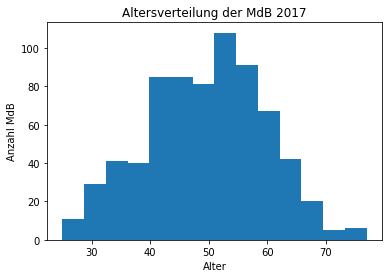

In [16]:
df_2017.ALTER.plot(kind="hist", title="Altersverteilung der MdB 2017", bins=14)
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")

Im Folgenden schlüsseln wir die Altersverteilung nach Parteien auf. Dazu schauen wir uns wieder die oben bereits ausgewählten Wahlperioden an. 

Text(0,0.5,'Alter')

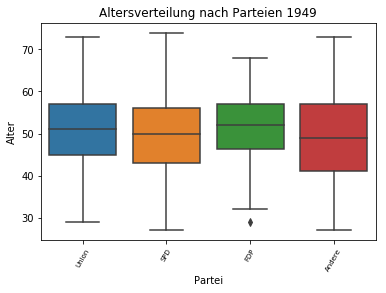

In [76]:
sns.boxplot(df_1949['PARTEI_KURZ'], df_1949['ALTER'], order=('Union', 'SPD', 'FDP', 'Andere'))
plt.title('Altersverteilung nach Parteien 1949')
plt.xticks(rotation=60, size=7)
plt.xlabel('Partei')
plt.ylabel('Alter')

Text(0,0.5,'Alter')

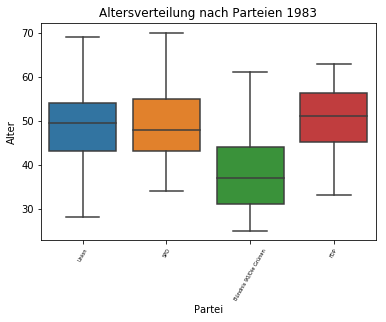

In [77]:
sns.boxplot(df_1983['PARTEI_KURZ'], df_1983['ALTER'], order=('Union', 'SPD', 'Bündnis 90/Die Grünen', 'FDP'))
plt.title('Altersverteilung nach Parteien 1983')
plt.xticks(rotation=60, size=5)
plt.xlabel('Partei')
plt.ylabel('Alter')

Text(0,0.5,'Alter')

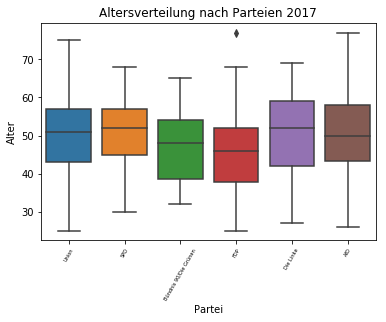

In [78]:
sns.boxplot(df_2017['PARTEI_KURZ'], df_2017['ALTER'], order=('Union', 'SPD', 'Bündnis 90/Die Grünen', 'FDP', 'Die Linke', 'AfD'))
plt.title('Altersverteilung nach Parteien 2017')
plt.xticks(rotation=60, size=5)
plt.xlabel('Partei')
plt.ylabel('Alter')

# Geschlechterverteilung

Bei den Geschlechtern ist das Merkmal männlich als 1, das Merkmal weiblich als 0 definiert. Daraus ergibt sich, dass der Durschnittswert der Geschlechter-column dem Anteil der Männer entspricht. 

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil der MdB im zeitlichen Verlauf')

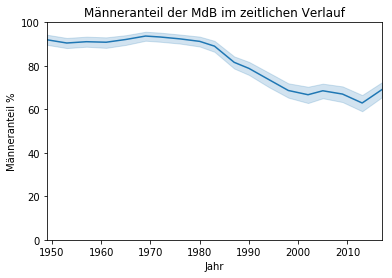

In [38]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df)
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil der MdB im zeitlichen Verlauf')

Nun schlüsseln wir den Männeranteil nach Parteien auf. Dazu nutzen wir die oben definierten DataFrames, die nach Parteien gescliced sind.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil in der Union im zeitlichen Verlauf')

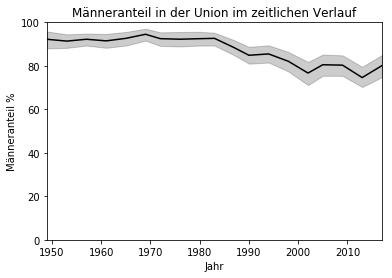

In [37]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_CDU, color='black')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der Union im zeitlichen Verlauf')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil in der SPD im zeitlichen Verlauf')

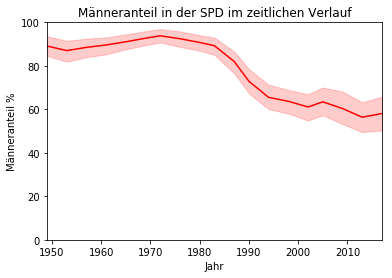

In [39]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_SPD, color='red')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der SPD im zeitlichen Verlauf')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil in der FDP im zeitlichen Verlauf')

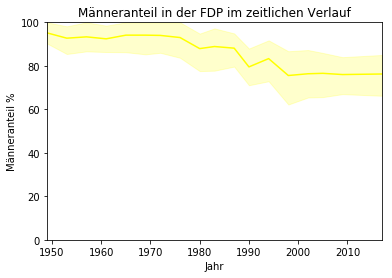

In [40]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_FDP, color='yellow')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der FDP im zeitlichen Verlauf')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil bei den Grünen im zeitlichen Verlauf')

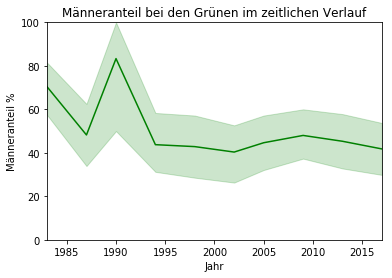

In [41]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_GRUENE, color='green')
plt.xlabel("Jahr")
plt.xlim(1983, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei den Grünen im zeitlichen Verlauf')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Männeranteil bei der Linken im zeitlichen Verlauf')

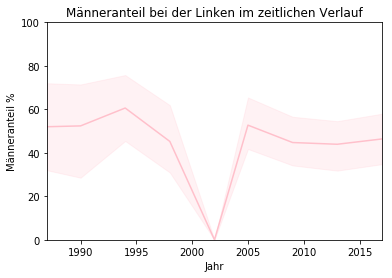

In [42]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_LINKE, color='pink')
plt.xlabel("Jahr")
plt.xlim(1987, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei der Linken im zeitlichen Verlauf')

# Ausländeranteil

Als Ausländer wurden diejenigen definiert, deren Geburtsort nicht in Deutschland liegt. Hier wurden das Merkmal Ausland mit 0 für in Deutschland geborene und mit 1 für im Ausland geborene definiert. Dadurch ergibt sich der Ausländeranteil als Mittelwert des Merkmals Ausland.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Ausländeranteil der MdB im zeitlichen Verlauf')

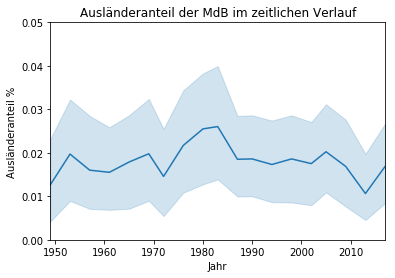

In [46]:
sns.lineplot(x="ANFANG", y="AUSLAND", data=df)
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Ausländeranteil %")
plt.ylim(0, 0.05)
plt.title('Ausländeranteil der MdB im zeitlichen Verlauf')

# Mandartsart

Es gibt zwei Möglichkeiten in den Bundestag einzuziehen, entweder über ein Direktmandat oder über die Landesliste. Die Direktwahl entspricht einem Wert von 1, während die Landesliste einen Wert von 0 hat. Der Durschnittswert entspricht also dem Anteil von MdB, die über ein Direktmandat eingezogen sind.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Anteil direkt gewählter MdB im zeitlichen Verlauf')

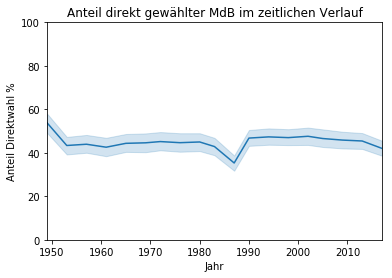

In [47]:
sns.lineplot(x="ANFANG", y="MANDATSART", data=df)
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Anteil Direktwahl %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Anteil direkt gewählter MdB im zeitlichen Verlauf')

# survival-rate

Als survival-rate wird der Prozentsatz bezeichnet, zu dem die MdB einer Wahlperiode auch in der nächsten WP dem Bundestag angehören. 

Text(0.5,1,'survival-rate der MdB im zeitlichen Verlauf')

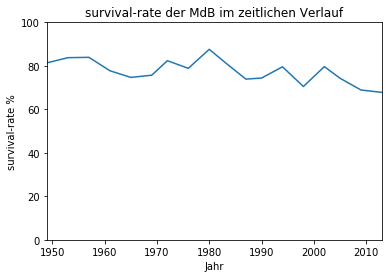

In [63]:
year_list=list(df.ANFANG.unique())
year_list.remove(2017)
survival_list=[]

for x in range(1, 19):
    df_loop=df[df['WP{}'.format(x)]==1]
    survival_list.append(df_loop['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list)
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB im zeitlichen Verlauf')

survival-rate nach Parteizugehörigkeit.

Text(0.5,1,'survival-rate der MdB der Union im zeitlichen Verlauf')

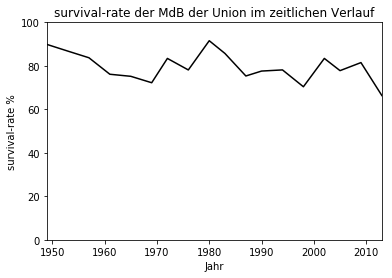

In [65]:
survival_list_Union=[]

for x in range(1, 19):
    df_loop_Union=df_CDU[df_CDU['WP{}'.format(x)]==1]
    survival_list_Union.append(df_loop_Union['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list_Union, color='black')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Union im zeitlichen Verlauf')

Text(0.5,1,'survival-rate der MdB der SPD im zeitlichen Verlauf')

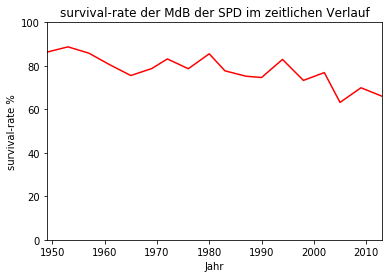

In [67]:
survival_list_SPD=[]

for x in range(1, 19):
    df_loop_SPD=df_SPD[df_SPD['WP{}'.format(x)]==1]
    survival_list_SPD.append(df_loop_SPD['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list_SPD, color='red')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der SPD im zeitlichen Verlauf')

Text(0.5,1,'survival-rate der MdB der FDP im zeitlichen Verlauf')

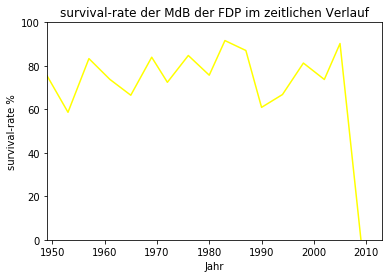

In [68]:
survival_list_FDP=[]

for x in range(1, 19):
    df_loop_FDP=df_FDP[df_FDP['WP{}'.format(x)]==1]
    survival_list_FDP.append(df_loop_FDP['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list_FDP, color='yellow')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der FDP im zeitlichen Verlauf')

Text(0.5,1,'survival-rate der MdB der Grünen im zeitlichen Verlauf')

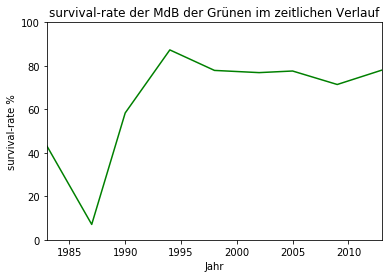

In [71]:
survival_list_Gruene=[]

for x in range(1, 19):
    df_loop_Gruene=df_GRUENE[df_GRUENE['WP{}'.format(x)]==1]
    survival_list_Gruene.append(df_loop_Gruene['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list_Gruene, color='green')
plt.xlabel('Jahr')
plt.xlim(1983, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Grünen im zeitlichen Verlauf')

Text(0.5,1,'survival-rate der MdB der Linken im zeitlichen Verlauf')

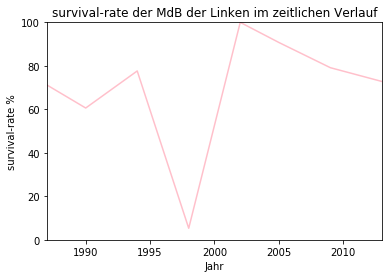

In [73]:
survival_list_Linke=[]

for x in range(1, 19):
    df_loop_Linke=df_LINKE[df_LINKE['WP{}'.format(x)]==1]
    survival_list_Linke.append(df_loop_Linke['WP{}'.format(x+1)].mean())
    
plt.plot(year_list, survival_list_Linke, color='pink')
plt.xlabel('Jahr')
plt.xlim(1987, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Linken im zeitlichen Verlauf')